In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
class_names= ["Zero", 
              "One", 
              "Two", 
              "Three", 
              "Four", 
              "Five", 
              "Six", 
              "Seven", 
              "Eight", 
              "Nine"]

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
np.min(train_labels), np.max(train_labels)

(0, 9)

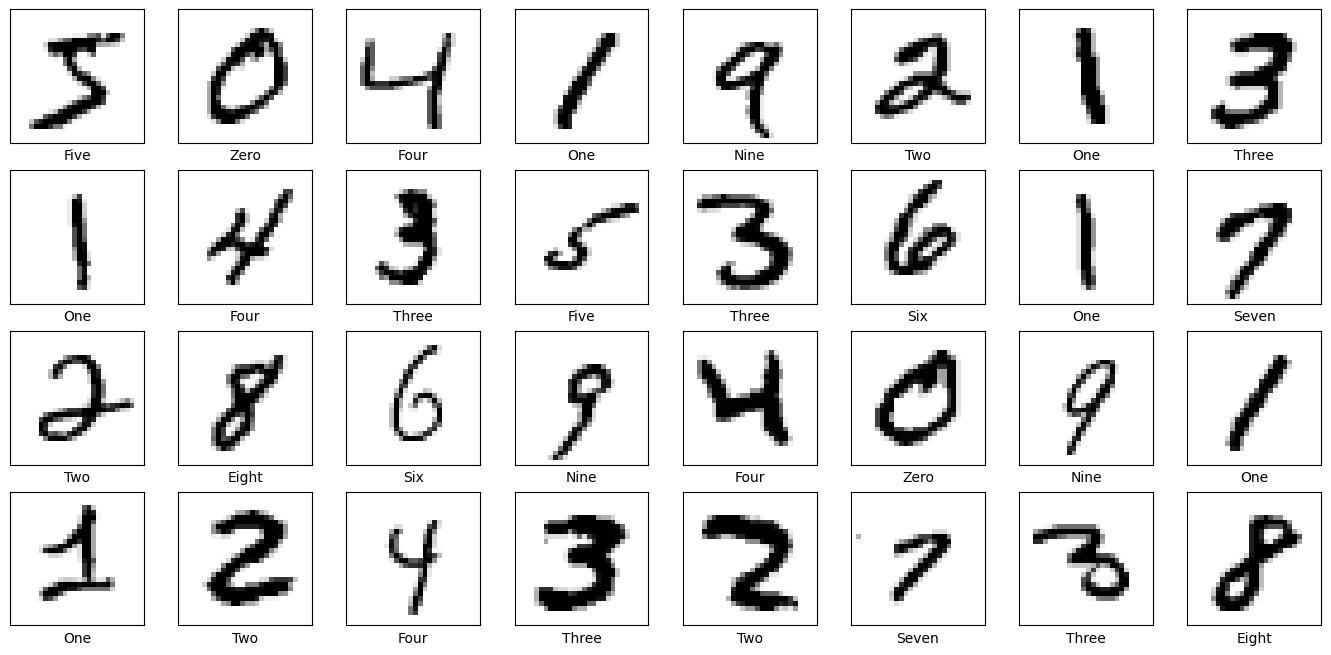

In [10]:

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = Sequential()
model.add(LSTM(10, input_shape=(28,28)))
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1560      
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
Total params: 1,670
Trainable params: 1,670
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
             metrics=["accuracy"])

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 1.1983 - accuracy: 0.6081 - val_loss: 0.7098 - val_accuracy: 0.7864
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6264 - accuracy: 0.8047 - val_loss: 0.5343 - val_accuracy: 0.8331
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4701 - accuracy: 0.8576 - val_loss: 0.4059 - val_accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3776 - accuracy: 0.8880 - val_loss: 0.3399 - val_accuracy: 0.9022
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3253 - accuracy: 0.9034 - val_loss: 0.2956 - val_accuracy: 0.9120
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.9136 - val_loss: 0.2624 - val_accuracy: 0.9222
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2684 - accuracy: 0.9203 - val_loss: 0.2556 - val_accuracy

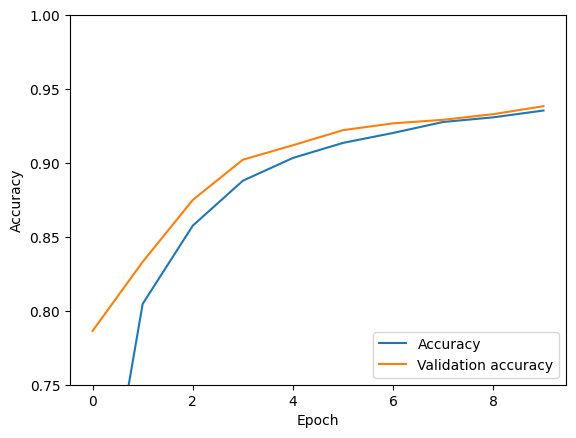

In [15]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.75, 1])
plt.legend(loc="lower right")

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("test acc: ", round(test_acc*100), "%")

313/313 - 1s - loss: 0.2087 - accuracy: 0.9384 - 936ms/epoch - 3ms/step
test acc:  94 %


313/313 [==============================] - 1s 2ms/step


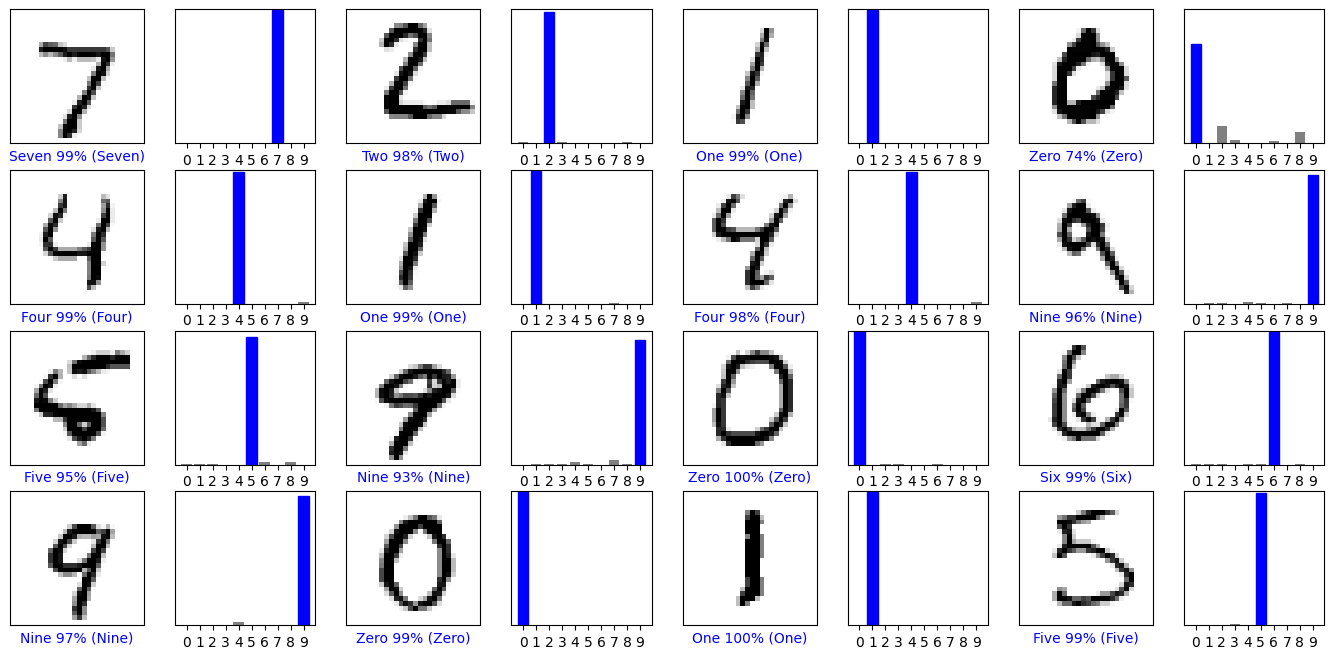

In [17]:
predictions = model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
        color = "blue"
    else:
        color = "red"
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                    100*np.max(predictions[i]),
                                    class_names[test_labels[i]]),
                                    color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])

    thisplot[np.argmax(predictions[i])].set_color("red")
    thisplot[test_labels[i]].set_color("blue")
    
plt.show()

**Test for the model**

In [18]:
img = test_images[11]
img.shape

(28, 28)

In [19]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [20]:
pred_testimg = model.predict(img)
max_confidence = np.argmax(pred_testimg[0])
max_confidence, class_names[max_confidence]


1/1 [==============================] - 0s 22ms/step


(6, 'Six')